In [1]:
import import_ipynb
import functions as fn
import numpy as np
import pandas as pd
from lstmcontroller import LstmController
from pidcontroller import PidController
import imageio
from sklearn.preprocessing import MinMaxScaler
from filelogger import FileLogger
from consolelogger import ConsoleLogger
from progresslogger import ProgressLogger
import matplotlib.pyplot as plt

importing Jupyter notebook from functions.ipynb
importing Jupyter notebook from lstmcontroller.ipynb
importing Jupyter notebook from pidcontroller.ipynb
importing Jupyter notebook from filelogger.ipynb
importing Jupyter notebook from consolelogger.ipynb
importing Jupyter notebook from progresslogger.ipynb


d:\programs\python 3.9\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
run_time = 45 * 60
Tsp = fn.generate_temperature_setpoints(30, 23.67, 240, 600, 30, 70, run_time + 1, seed=3)
kp = 6
ki = 0.08
kd = 0
out_min = 0
out_max = 100

TCLab version 0.4.9
Simulated TCLab
TCLab Model disconnected successfully.


In [3]:
loggers = [FileLogger('run_with_lstm_pid.log'), ProgressLogger(r'\d+', run_time)]
controllers = [PidController(kp, ki, kd, out_min, out_max, window=15)]
tm, Tpid, Qpid, *_ = fn.run_tclab(run_time, Tsp, controllers, loggers=loggers, connected=False, speedup=60)

  0%|▏                                                                                | 6/2700 [00:00<00:38, 69.28it/s]

TCLab version 0.4.9
Simulated TCLab


100%|██████████████████████████████████████████████████████████████████████████████| 2700/2700 [00:45<00:00, 60.00it/s]

Progress Logger: pbar closed
TCLab Model disconnected successfully.


In [4]:
loggers = [FileLogger('run_with_lstm_lstm.log'), ProgressLogger(r'\d+', run_time)]
controllers = [LstmController.load_model('pid_emulate.h5', 'model_params.pkl')]
tm, Tlstm, Qlstm, *_ = fn.run_tclab(run_time, Tsp, controllers, loggers=loggers, connected=False, speedup=60)

  0%|                                                                               | 1/2700 [00:01<1:17:23,  1.72s/it]

TCLab version 0.4.9
Simulated TCLab


100%|██████████████████████████████████████████████████████████████████████████████| 2700/2700 [05:14<00:00,  8.60it/s]

Progress Logger: pbar closed
TCLab Model disconnected successfully.


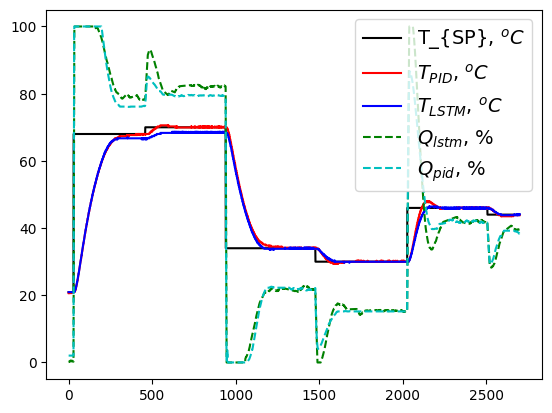

In [5]:
plt.plot(Tsp,'k-',label='T_{SP}, $^oC$')
plt.plot(Tpid, 'r-',label='$T_{PID}$, $^oC$')
plt.plot(Tlstm, 'b-',label='$T_{LSTM}$, $^oC$')
plt.plot(Qpid,'g--',label='$Q_{LSTM}$, %')
plt.plot(Qlstm,'c--',label='$Q_{PID}$, %')
plt.legend(loc='upper right',fontsize=14)
plt.savefig('TCL_with_LSTM.png')